In [1]:
# As usual, we begin by loading the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# Now we load the data

IPL=pd.read_excel("Assignment Data/Week 5/IPL (assignment) data.xlsx")

In [3]:
IPL.describe()

,year,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,2012.945652,14.391304,7.076087,7.076087,0.239130,14.391304,0.001772,0.119565,0.119565,0.097826,0.086957,7.110445e+06
std,3.125099,0.797751,2.195068,2.164822,0.477391,4.332237,0.519739,0.326230,0.326230,0.298707,0.283315,2.663266e+06
min,2008.000000,14.000000,2.000000,3.000000,0.000000,4.000000,-1.436000,0.000000,0.000000,0.000000,0.000000,1.725000e+06
25%,2010.000000,14.000000,6.000000,5.000000,0.000000,12.000000,-0.343750,0.000000,0.000000,0.000000,0.000000,5.178750e+06
50%,2013.000000,14.000000,7.000000,7.000000,0.000000,14.000000,0.018000,0.000000,0.000000,0.000000,0.000000,6.809583e+06
75%,2016.000000,14.000000,9.000000,8.000000,0.000000,18.000000,0.323000,0.000000,0.000000,0.000000,0.000000,9.286749e+06
max,2018.000000,16.000000,11.000000,13.000000,2.000000,22.000000,1.084000,1.000000,1.000000,1.000000,1.000000,1.334500e+07


In [4]:
IPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 13 columns):
year          92 non-null int64
team          92 non-null object
played        92 non-null int64
won           92 non-null int64
lost          92 non-null int64
noresult      92 non-null int64
points        92 non-null int64
netrunrate    92 non-null float64
champions     92 non-null int64
runnersup     92 non-null int64
third         92 non-null int64
fourth        92 non-null int64
salaries      92 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 9.4+ KB


In [5]:
Sumsal = IPL.groupby(['year'])['salaries'].sum().reset_index().rename(columns={'salaries':'allsal'})
Sumsal

,year,allsal
0,2008,34105000
1,2009,33445000
2,2010,33075000
3,2011,62210000
4,2012,59706250
5,2013,81535000
6,2014,73973332
7,2015,65242665
8,2016,63483666
9,2017,63014833


In [6]:
IPL = pd.merge(IPL, Sumsal, on=['year'], how='left')
display(IPL)

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250
5,2013,Chennai Super Kings,16,11,5,0,22,0.530,0,1,0,0,10740000,81535000
6,2014,Chennai Super Kings,14,9,5,0,18,0.385,0,0,1,0,11279000,73973332
7,2015,Chennai Super Kings,14,9,5,0,18,0.709,0,1,0,0,9780000,65242665
8,2018,Chennai Super Kings,14,9,5,0,18,0.253,1,0,0,0,11321760,84370160
9,2008,Deccan Chargers,14,2,12,0,4,-0.467,0,0,0,0,5885000,34105000


In [7]:
IPL['relsal']= IPL['salaries']/IPL['allsal']

In [8]:
IPL['wpc'] = IPL['won']/(IPL['played']-IPL['noresult'])

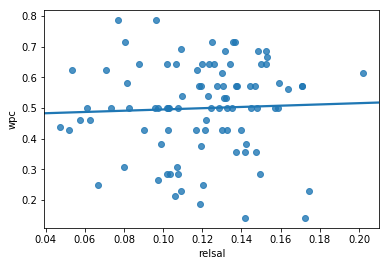

In [9]:
sns.regplot(x="relsal", y="wpc", data = IPL, ci=False)

In [10]:
wpcsal1_lm = smf.ols(formula = 'wpc ~ relsal', data=IPL).fit()
print(wpcsal1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1622
Date:                Fri, 10 Jul 2020   Prob (F-statistic):              0.688
Time:                        10:19:13   Log-Likelihood:                 45.259
No. Observations:                  92   AIC:                            -86.52
Df Residuals:                      90   BIC:                            -81.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4752      0.063      7.563      0.0

In [11]:
IPL.sort_values(by=['team','year'], ascending=True)

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,relsal,wpc
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796,0.571429
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272,0.615385
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846,0.500000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752,0.642857
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314,0.533333
5,2013,Chennai Super Kings,16,11,5,0,22,0.530,0,1,0,0,10740000,81535000,0.131723,0.687500
6,2014,Chennai Super Kings,14,9,5,0,18,0.385,0,0,1,0,11279000,73973332,0.152474,0.642857
7,2015,Chennai Super Kings,14,9,5,0,18,0.709,0,1,0,0,9780000,65242665,0.149902,0.642857
8,2018,Chennai Super Kings,14,9,5,0,18,0.253,1,0,0,0,11321760,84370160,0.134192,0.642857
9,2008,Deccan Chargers,14,2,12,0,4,-0.467,0,0,0,0,5885000,34105000,0.172555,0.142857


In [12]:
IPL['wpc_lag'] = IPL.groupby('team')['wpc'].shift(1)
IPL

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,allsal,relsal,wpc,wpc_lag
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796,0.571429,NaN
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272,0.615385,0.571429
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846,0.500000,0.615385
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752,0.642857,0.500000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314,0.533333,0.642857
5,2013,Chennai Super Kings,16,11,5,0,22,0.530,0,1,0,0,10740000,81535000,0.131723,0.687500,0.533333
6,2014,Chennai Super Kings,14,9,5,0,18,0.385,0,0,1,0,11279000,73973332,0.152474,0.642857,0.687500
7,2015,Chennai Super Kings,14,9,5,0,18,0.709,0,1,0,0,9780000,65242665,0.149902,0.642857,0.642857
8,2018,Chennai Super Kings,14,9,5,0,18,0.253,1,0,0,0,11321760,84370160,0.134192,0.642857,0.642857
9,2008,Deccan Chargers,14,2,12,0,4,-0.467,0,0,0,0,5885000,34105000,0.172555,0.142857,NaN


In [13]:
wpcsal2_lm = smf.ols(formula = 'wpc ~wpc_lag + relsal', data=IPL).fit()
print(wpcsal2_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.591
Date:                Fri, 10 Jul 2020   Prob (F-statistic):              0.210
Time:                        10:19:13   Log-Likelihood:                 43.314
No. Observations:                  79   AIC:                            -80.63
Df Residuals:                      76   BIC:                            -73.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3489      0.087      4.003      0.0

In [14]:
wpcsal3_lm = smf.ols(formula = 'wpc ~ wpc_lag + relsal +C(team)', data=IPL).fit()
print(wpcsal3_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     2.117
Date:                Fri, 10 Jul 2020   Prob (F-statistic):             0.0245
Time:                        10:19:13   Log-Likelihood:                 55.639
No. Observations:                  79   AIC:                            -83.28
Df Residuals:                      65   BIC:                            -50.10
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------